<a href="https://colab.research.google.com/github/binineni/AI4DL/blob/main/week5/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [13]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 21ms/step - loss: 0.6209 - accuracy: 0.8108 - val_loss: 0.2776 - val_accuracy: 0.9155
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2535 - accuracy: 0.9221 - val_loss: 0.1777 - val_accuracy: 0.9452
Epoch 3/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1670 - accuracy: 0.9492 - val_loss: 0.1884 - val_accuracy: 0.9417
Epoch 4/10
375/375 [==============================] - 8s 20ms/step - loss: 0.1195 - accuracy: 0.9628 - val_loss: 0.1352 - val_accuracy: 0.9612
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0864 - accuracy: 0.9729 - val_loss: 0.2073 - val_accuracy: 0.9347
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.1256 - val_accuracy: 0.9641
Epoch 7/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.2890 - val_accuracy: 0.9211

In [14]:
model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2954 - accuracy: 0.9154 - val_loss: 0.1527 - val_accuracy: 0.9558
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1220 - accuracy: 0.9647 - val_loss: 0.1052 - val_accuracy: 0.9675
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0807 - accuracy: 0.9760 - val_loss: 0.0927 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0847 - val_accuracy: 0.9744
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0768 - val_accuracy: 0.9781
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.0722 - val_accuracy: 0.9769
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0242 - accuracy: 0.9935 - val_loss: 0.0763 - val_accuracy: 0.9787

**Plotting a validation accuracy comparison**

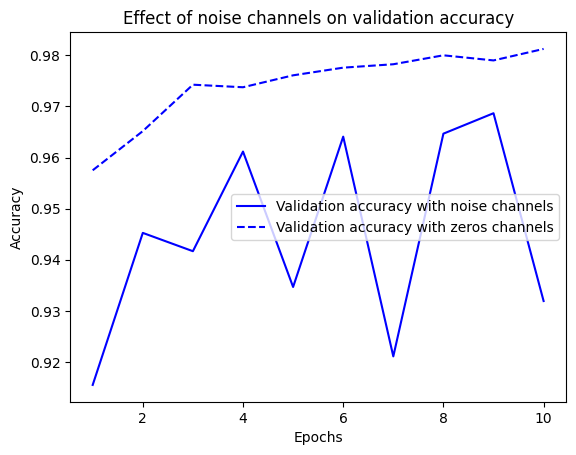

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_random = model.fit(train_images, random_train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 6s 14ms/step - loss: 2.3165 - accuracy: 0.1044 - val_loss: 2.3037 - val_accuracy: 0.1067
Epoch 2/20
375/375 [==============================] - 7s 17ms/step - loss: 2.2995 - accuracy: 0.1193 - val_loss: 2.3095 - val_accuracy: 0.1071
Epoch 3/20
375/375 [==============================] - 7s 18ms/step - loss: 2.2918 - accuracy: 0.1247 - val_loss: 2.3161 - val_accuracy: 0.1013
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 2.2803 - accuracy: 0.1391 - val_loss: 2.3289 - val_accuracy: 0.0986
Epoch 5/20
375/375 [==============================] - 5s 14ms/step - loss: 2.2652 - accuracy: 0.1494 - val_loss: 2.3327 - val_accuracy: 0.0991
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 2.2465 - accuracy: 0.1632 - val_loss: 2.3443 - val_accuracy: 0.0993
Epoch 7/20
375/375 [==============================] - 6s 17ms/step - loss: 2.2235 - accuracy: 0.1797 - val_loss: 2.3636 - val_accuracy: 0.1026

In [7]:
history_random.history["val_accuracy"][:10]

[0.1066666692495346,
 0.10708333551883698,
 0.10125000029802322,
 0.09858333319425583,
 0.09908333420753479,
 0.09933333098888397,
 0.10258333384990692,
 0.10324999690055847,
 0.09708333015441895,
 0.10000000149011612]

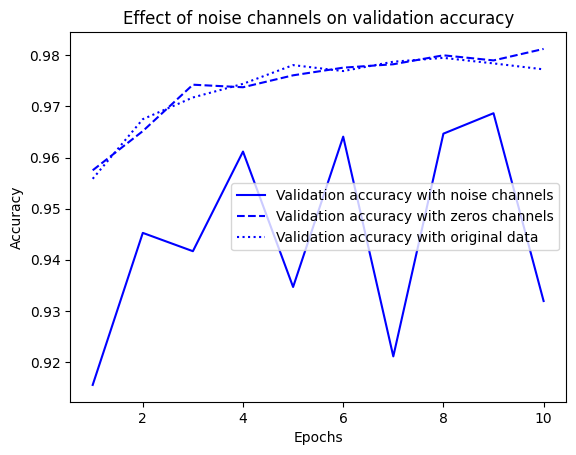

In [15]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_random = history.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_random, "b:",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

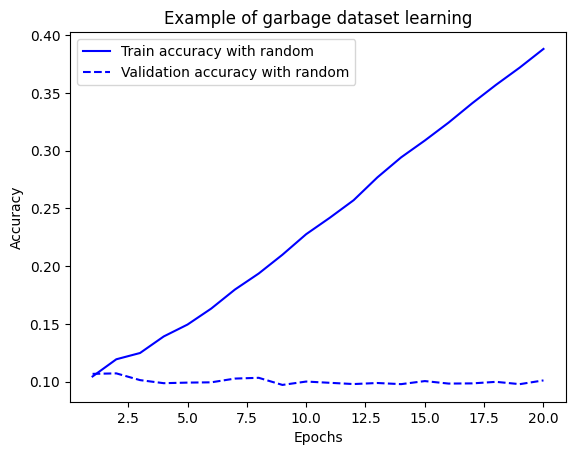

In [20]:
import matplotlib.pyplot as plt
train_acc_random = history_random.history["accuracy"]
val_acc_random = history_random.history["val_accuracy"]

epochs = range(1, 21)
plt.plot(epochs, train_acc_random, "b-",
         label="Train accuracy with random")
plt.plot(epochs, val_acc_random, "b--",
         label="Validation accuracy with random")
plt.title("Example of garbage dataset learning")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [21]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 629.1216 - accuracy: 0.3316 - val_loss: 2.2120 - val_accuracy: 0.1963
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 2.8981 - accuracy: 0.2047 - val_loss: 2.5296 - val_accuracy: 0.2332
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5752 - accuracy: 0.2218 - val_loss: 2.5684 - val_accuracy: 0.2549
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3555 - accuracy: 0.2179 - val_loss: 2.6506 - val_accuracy: 0.2326
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3941 - accuracy: 0.1980 - val_loss: 2.3011 - val_accuracy: 0.1933
Epoch 6/10
375/375 [==============================] - 4s 9ms/step - loss: 2.6077 - accuracy: 0.1838 - val_loss: 2.3650 - val_accuracy: 0.1715
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.2524 - accuracy: 0.2101 - val_loss: 2.2539 - val_accuracy: 0.236

**The same model with a more appropriate learning rate**

In [22]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3860 - accuracy: 0.9090 - val_loss: 0.1372 - val_accuracy: 0.9603
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1304 - accuracy: 0.9639 - val_loss: 0.1545 - val_accuracy: 0.9619
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0998 - accuracy: 0.9736 - val_loss: 0.1303 - val_accuracy: 0.9715
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0807 - accuracy: 0.9789 - val_loss: 0.1824 - val_accuracy: 0.9673
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0687 - accuracy: 0.9831 - val_loss: 0.1614 - val_accuracy: 0.9729
Epoch 6/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0619 - accuracy: 0.9850 - val_loss: 0.1874 - val_accuracy: 0.9723
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0589 - accuracy: 0.9863 - val_loss: 0.1885 - val_accuracy: 0.9724


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [23]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.5312 - accuracy: 0.7804 - val_loss: 0.3993 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3270 - accuracy: 0.8937 - val_loss: 0.3377 - val_accuracy: 0.8673
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2468 - accuracy: 0.9145 - val_loss: 0.2924 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1984 - accuracy: 0.9337 - val_loss: 0.2977 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1678 - accuracy: 0.9446 - val_loss: 0.2900 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1389 - accuracy: 0.9556 - val_loss: 0.2840 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1212 - accurac

**Version of the model with lower capacity**

In [24]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 94ms/step - loss: 0.6234 - accuracy: 0.7447 - val_loss: 0.5493 - val_accuracy: 0.8080
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4709 - accuracy: 0.8741 - val_loss: 0.4295 - val_accuracy: 0.8673
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3704 - accuracy: 0.8996 - val_loss: 0.3664 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3078 - accuracy: 0.9117 - val_loss: 0.3287 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2630 - accuracy: 0.9223 - val_loss: 0.3041 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2296 - accuracy: 0.9305 - val_loss: 0.2885 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2041 - accuracy: 0.9377 - val_loss: 0.2801 - val_accuracy: 0.8902
Epoch 8/20
30

**Version of the model with higher capacity**

In [25]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 14s 429ms/step - loss: 0.5699 - accuracy: 0.7175 - val_loss: 0.3436 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 10s 322ms/step - loss: 0.3242 - accuracy: 0.8656 - val_loss: 0.2759 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 12s 402ms/step - loss: 0.2400 - accuracy: 0.9040 - val_loss: 0.3095 - val_accuracy: 0.8724
Epoch 4/20
30/30 [==============================] - 14s 472ms/step - loss: 0.1894 - accuracy: 0.9235 - val_loss: 0.2710 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 15s 497ms/step - loss: 0.1417 - accuracy: 0.9465 - val_loss: 0.2729 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 9s 302ms/step - loss: 0.1012 - accuracy: 0.9639 - val_loss: 0.3611 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 10s 335ms/step - loss: 0.0839 - accuracy: 0.9727 - val_loss: 0.3588 - val_accuracy: 0.8844


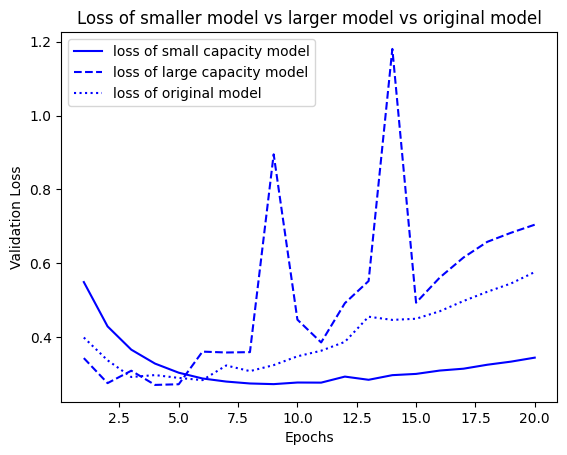

In [33]:
import matplotlib.pyplot as plt
small_loss = history_smaller_model.history["val_loss"]
larger_loss = history_larger_model.history["val_loss"]
origin_loss = history_original.history["val_loss"]


epochs = range(1, 21)
plt.plot(epochs, small_loss, "b-",
         label="loss of small capacity model")
plt.plot(epochs, larger_loss, "b--",
         label="loss of large capacity model")
plt.plot(epochs, origin_loss, "b:",
         label="loss of original model")
plt.title("Loss of smaller model vs larger model vs original model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [26]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.6360 - accuracy: 0.7683 - val_loss: 0.5034 - val_accuracy: 0.8636
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4381 - accuracy: 0.8848 - val_loss: 0.4129 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3569 - accuracy: 0.9077 - val_loss: 0.3824 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3156 - accuracy: 0.9200 - val_loss: 0.3788 - val_accuracy: 0.8784
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2904 - accuracy: 0.9275 - val_loss: 0.3677 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2774 - accuracy: 0.9327 - val_loss: 0.3616 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2636 - accuracy: 0.9385 - val_loss: 0.3661 - val_accuracy: 0.8850
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [27]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.6530 - accuracy: 0.6057 - val_loss: 0.5586 - val_accuracy: 0.8331
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5568 - accuracy: 0.7231 - val_loss: 0.4536 - val_accuracy: 0.8664
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4728 - accuracy: 0.7918 - val_loss: 0.3722 - val_accuracy: 0.8780
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4068 - accuracy: 0.8371 - val_loss: 0.3281 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3553 - accuracy: 0.8606 - val_loss: 0.2921 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3195 - accuracy: 0.8827 - val_loss: 0.2774 - val_accuracy: 0.8913
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2730 - accuracy: 0.9062 - val_loss: 0.2734 - val_accuracy: 0.8930
Epoch 8/20
30

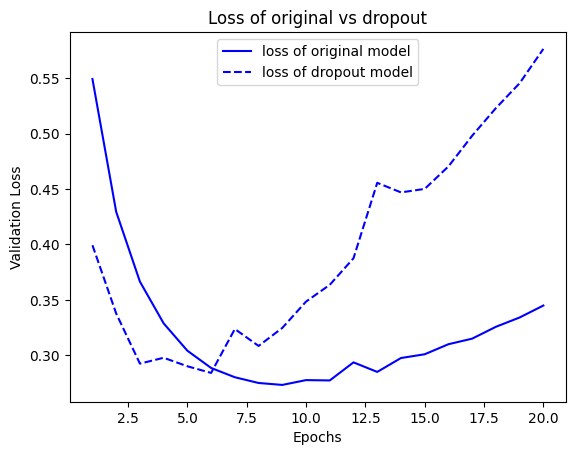

In [32]:
import matplotlib.pyplot as plt
origin_loss = history_original.history["val_loss"]
dropout_loss = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, small_loss, "b-",
         label="loss of original model")
plt.plot(epochs, origin_loss, "b--",
         label="loss of dropout model")
plt.title("Loss of original vs dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

## Summary